## A pipeline for Transcriptomic data using Seurat 
### Sample F8_38

In [1]:
library(Seurat)

Attaching SeuratObject

Attaching sp



ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected SPECIAL
1: %%
    ^


In [5]:
if (FALSE) {
# For output from CellRanger < 3.0
data_dir <- '/home/kv64/Desktop/science_papers/spatial_ml_tumor/F8_38_c'
list.files(data_dir) # Should show barcodes.tsv, genes.tsv, and matrix.mtx
expression_matrix <- Read10X(data.dir = data_dir)
seurat_object = CreateSeuratObject(counts = expression_matrix)

# For output from CellRanger >= 3.0 with multiple data types
data_dir <- '/home/kv64/Desktop/science_papers/spatial_ml_tumor/F8_38_c'
list.files(data_dir) # Should show barcodes.tsv.gz, features.tsv.gz, and matrix.mtx.gz
data <- Read10X(data.dir = data_dir)
seurat_object = CreateSeuratObject(counts = data$`Gene Expression`)
seurat_object[['Protein']] = CreateAssayObject(counts = data$`Antibody Capture`)
}

### 1. Read data to a Seurat object 

In [42]:
library(dplyr)
library(Seurat)
library(patchwork)

# Load the PBMC dataset
pbmc.data <- Read10X(data.dir = "new_outs/mouse_outs/F8_37_outs/filtered_feature_bc_matrix")
# Initialize the Seurat object with the raw (non-normalized data).
pbmc <- CreateSeuratObject(counts = pbmc.data, project = "pbmc3k", min.cells = 3, min.features = 200)
pbmc

An object of class Seurat 
17016 features across 3520 samples within 1 assay 
Active assay: RNA (17016 features, 0 variable features)

In [43]:
rownames(x = pbmc)

[1] "Sox17"              "Mrpl15"             "Lypla1"            
    [4] "Tcea1"              "Atp6v1h"            "4732440D04Rik"     
    [7] "Rb1cc1"             "Alkal1"             "ENSMUSG00000120372"
   [10] "Pcmtd1"             "Gm26901"            "Sntg1"             
   [13] "Rrs1"               "Adhfe1"             "2610203C22Rik"     
   [16] "Vxn"                "Mybl1"              "Vcpip1"            
   [19] "1700034P13Rik"      "Sgk3"               "Snhg6"             
   [22] "Mcmdc2"             "Tcf24"              "Ppp1r42"           
   [25] "Cops5"              "Cspp1"              "Arfgef1"           
   [28] "Prex2"              "Sulf1"              "Slco5a1"           
   [31] "Prdm14"             "Ncoa2"              "Tram1"             
   [34] "Lactb2"             "Xkr9"               "Gm9947"            
   [37] "Msc"                "Terf1"              "Rpl7"              
   [40] "Rdh10"              "Stau2"              "Ube2w"             
   [43] "Eloc"               "Tmem70"             "Ly96"              
   [46] "Jph1"               "Pi15"               "Crispld1"          
   [49] "Tfap2b"             "Pkhd1"              "Mcm3"              
   [52] "Paqr8"              "Efhc1"              "Tram2"             
   [55] "Tmem14a"            "Gsta3"              "Kcnq5"             
   [58] "Rims1"              "Gm29107"            "Ogfrl1"            
   [61] "B3gat2"             "Smap1"              "Sdhaf4"            
   [64] "Fam135a"            "Lmbrd1"             "Gm5524"            
   [67] "Phf3"               "Ptp4a1"             "4931428L18Rik"     
   [70] "Prim2"              "ENSMUSG00000121274" "Rab23"             
   [73] "Bag2"               "Zfp451"             "Bend6"             
   [76] "Dst"                "Gm37233"            "Ccdc115"           
   [79] "Imp4"               "Ptpn18"             "Gm28417"           
   [82] "Arhgef4"            "Gm38336"            "Fam168b"           
   [85] "Plekhb2"            "1110002O04Rik"      "Hs6st1"            
   [88] "Gm33280"            "Uggt1"              "Neurl3"            
   [91] "Arid5a"             "Kansl3"             "Lman2l"            
   [94] "Cnnm4"              "Cnnm3"              "Ankrd23"           
   [97] "Ankrd39"            "Sema4c"             "D430040D24Rik"     
  [100] "Fam178b"            "Cox5b"              "Actr1b"            
  [103] "Zap70"              "Tmem131"            "Vwa3b"             
  [106] "Inpp4a"             "Coa5"               "Unc50"             
  [109] "Mgat4a"             "Cracdl"             "Tsga10"            
  [112] "Lipt1"              "Mitd1"              "Mrpl30"            
  [115] "Txndc9"             "Eif5b"              "Rev1"              
  [118] "Aff3"               "Lonrf2"             "Chst10"            
  [121] "Pdcl3"              "Npas2"              "Rpl31"             
  [124] "Tbc1d8"             "Cnot11"             "Gm15832"           
  [127] "Rnf149"             "Creg2"              "Rfx8"              
  [130] "Map4k4"             "Il1r2"              "Il1r1"             
  [133] "Il1rl2"             "Il1rl1"             "Il18r1"            
  [136] "Il18rap"            "Mfsd9"              "Tmem182"           
  [139] "Pou3f3"             "Mrps9"              "Gpr45"             
  [142] "Tgfbrap1"           "8430432A02Rik"      "AI597479"          
  [145] "Fhl2"               "Nck2"               "Ecrg4"             
  [148] "Gm29155"            "Uxs1"               "ENSMUSG00000120105"
  [151] "Tpp2"               "Tex30"              "Poglut2"           
  [154] "Bivm"               "Ercc5"              "Gulp1"             
  [157] "Col3a1"             "Col5a2"             "Wdr75"             
  [160] "Slc40a1"            "Dnah7b"             "Slc39a10"          
  [163] "Gm28151"            "Cavin2"             "Nabp1"             
  [166] "ENSMUSG00000120049" "Gm17767"            "Gm28055"           
  [169] "Myo1b"             

### Standard pre-processing workflow

In [44]:
# pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")

In [45]:
# # Visualize QC metrics as a violin plot
# VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [46]:
# plot1 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "percent.mt")
# plot2 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
# plot1 + plot2

### 2. Normalizing the data

In [47]:
#Old Log Normalization Pipeline:
#pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)

#New sctransform Pipeline:
library(sctransform)
pbmc <- SCTransform(object = pbmc)

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 16163 by 3520

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 3520 cells



  |======================================================================| 100%


Found 42 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 16163 genes



  |======================================================================| 100%


Computing corrected count matrix for 16163 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 57.30087 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT



In [48]:
#pbmc <- NormalizeData(pbmc)

### 3. Identification of highly variable features (recommended Top 2000) 

Notice that with the switch to sctransform, much of the additional functions such as FindVariableFeatures and NormalizeData are redundant.

When using repel, set xnudge and ynudge to 0 for optimal results



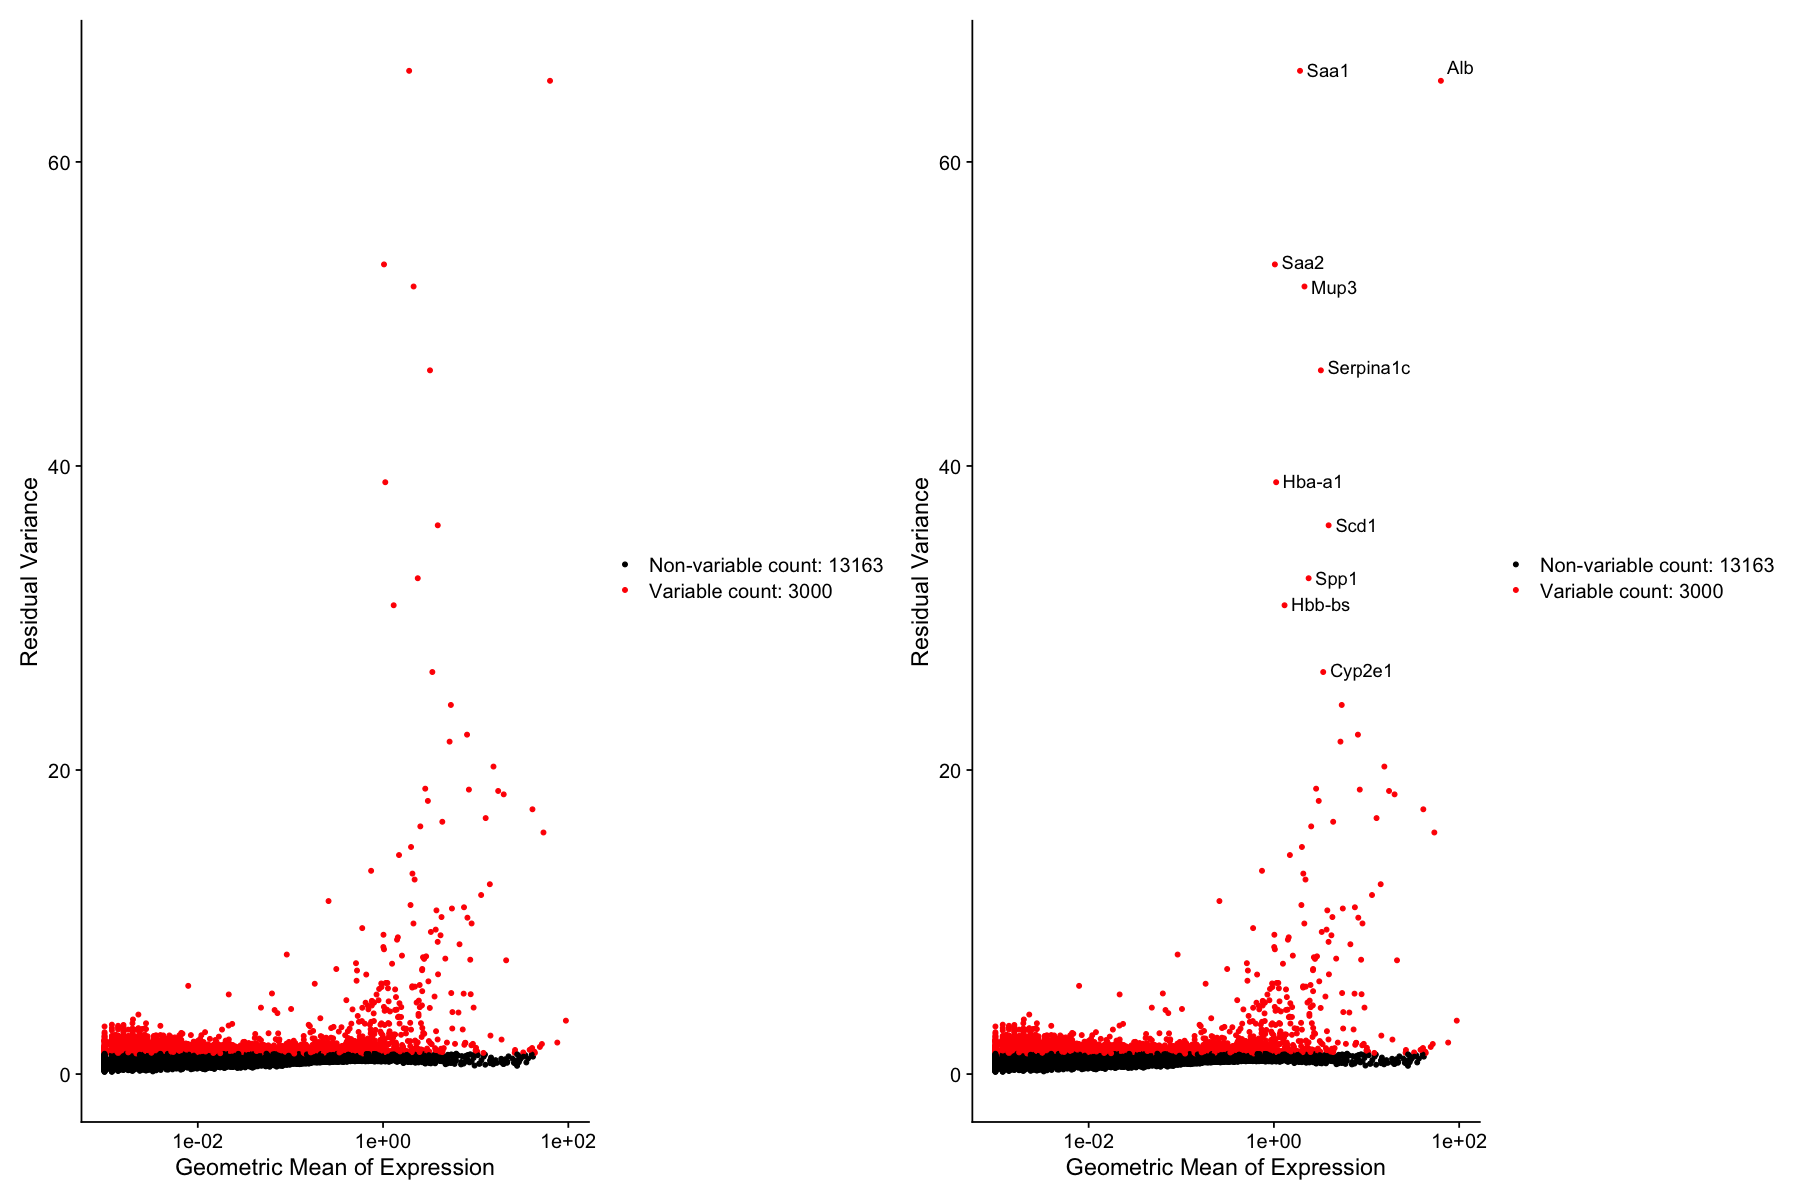

In [49]:
#pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(pbmc), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(pbmc)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
options(repr.plot.width=15, repr.plot.height=10)
plot1 + plot2

### 4. Scalind data center around zeros for all genes

In [50]:
# all.genes <- rownames(pbmc)
# pbmc <- ScaleData(pbmc, features = all.genes)

### 5. Dimensionality reduction using PCA for all genes

In [51]:
# pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

### 6. Scalind data center around zeros for top 2000 features

Thanks to sctransform, ScaleData is not necessary.

In [52]:
#pbmc <- ScaleData(pbmc)

### 7. Dimensionality Reduction using PCA for top 2000 features

In [53]:
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

PC_ 1 
Positive:  Rpl17, Rps19, Rpl36a-ps1, AI506816, Rpl9-ps6, Rbm39, Gata3, Rps27rt, Numa1, Sumo2 
	   Rps18-ps5, Hnrnpa1, Morf4l2, Mat2a, Hipk1, Rpl39l, Hnrnph1, Gm9844, Rpl32, S100a6 
	   Sytl1, Rpl10, Rps7, Gm5244, Rps3, Atp1b1, Col1a2, Hes1, Sf3b1, Gse1 
Negative:  Alb, Scd1, Apoa1, Ttr, Trf, Serpina1c, Apoc1, Apoa2, Serpina3k, Mup3 
	   mt-Co1, Gc, mt-Co3, Hp, Apoe, Serpina1b, mt-Cytb, Mug1, mt-Atp6, Wfdc21 
	   Hpx, Orm1, Fgb, Mgst1, Fgg, Cyp2e1, Saa1, Hamp, Ambp, Fga 
PC_ 2 
Positive:  Spp1, Clu, Col1a1, Col3a1, Mt1, Lcn2, Col1a2, Cd74, Mt2, Tmsb4x 
	   Timp1, Acta2, Hpx, Krt18, Sparc, Serpinh1, H2-Aa, Saa1, Alb, Krt8 
	   Col5a1, Hp, H2-Ab1, Fth1, Bgn, H2-Eb1, Saa2, Trf, Rpl41, C3 
Negative:  Cyp1a2, Rgn, Cyp2c50, Car3, Ces3a, Mat1a, Pon1, Cyp2e1, Slco1b2, Hpd 
	   Rpl36a-ps1, Rpl17, Slc22a1, Sult2a8, Akr1c6, Cyp2c29, Rbm39, Atp1b1, Ces1b, Gsta3 
	   Cyp2d9, Glul, Slc10a1, Phyh, Mup1, Rnase4, Rpl9-ps6, Serpina6, Hrg, Fabp1 
PC_ 3 
Positive:  Mt1, Spp1, Mt2, Clu, Saa1, Krt18, 

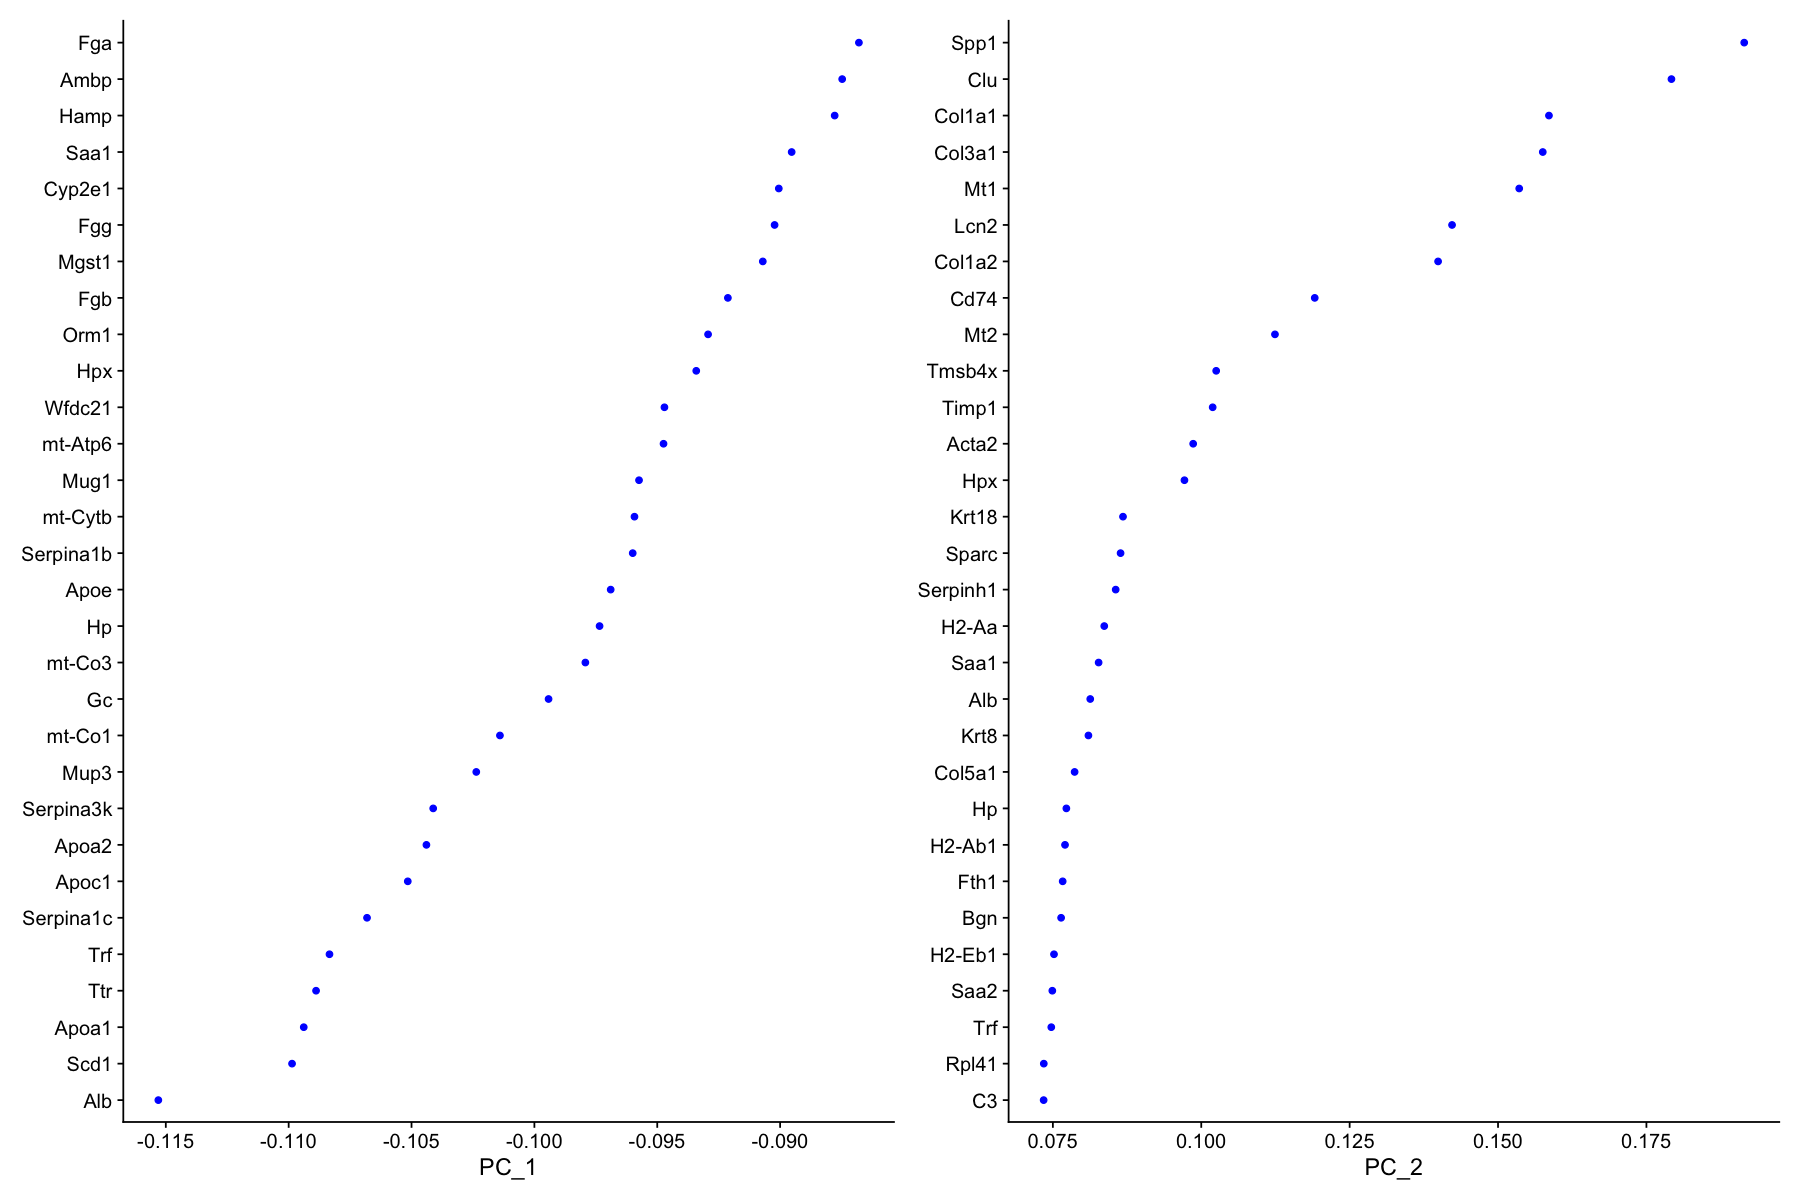

In [54]:
VizDimLoadings(pbmc, dims = 1:2, reduction = "pca")

### Elbow Graph for selecting the optimum number of PCs

The graph stabilizes after PC6. The first five PCs are sufficient to capture the variations.  

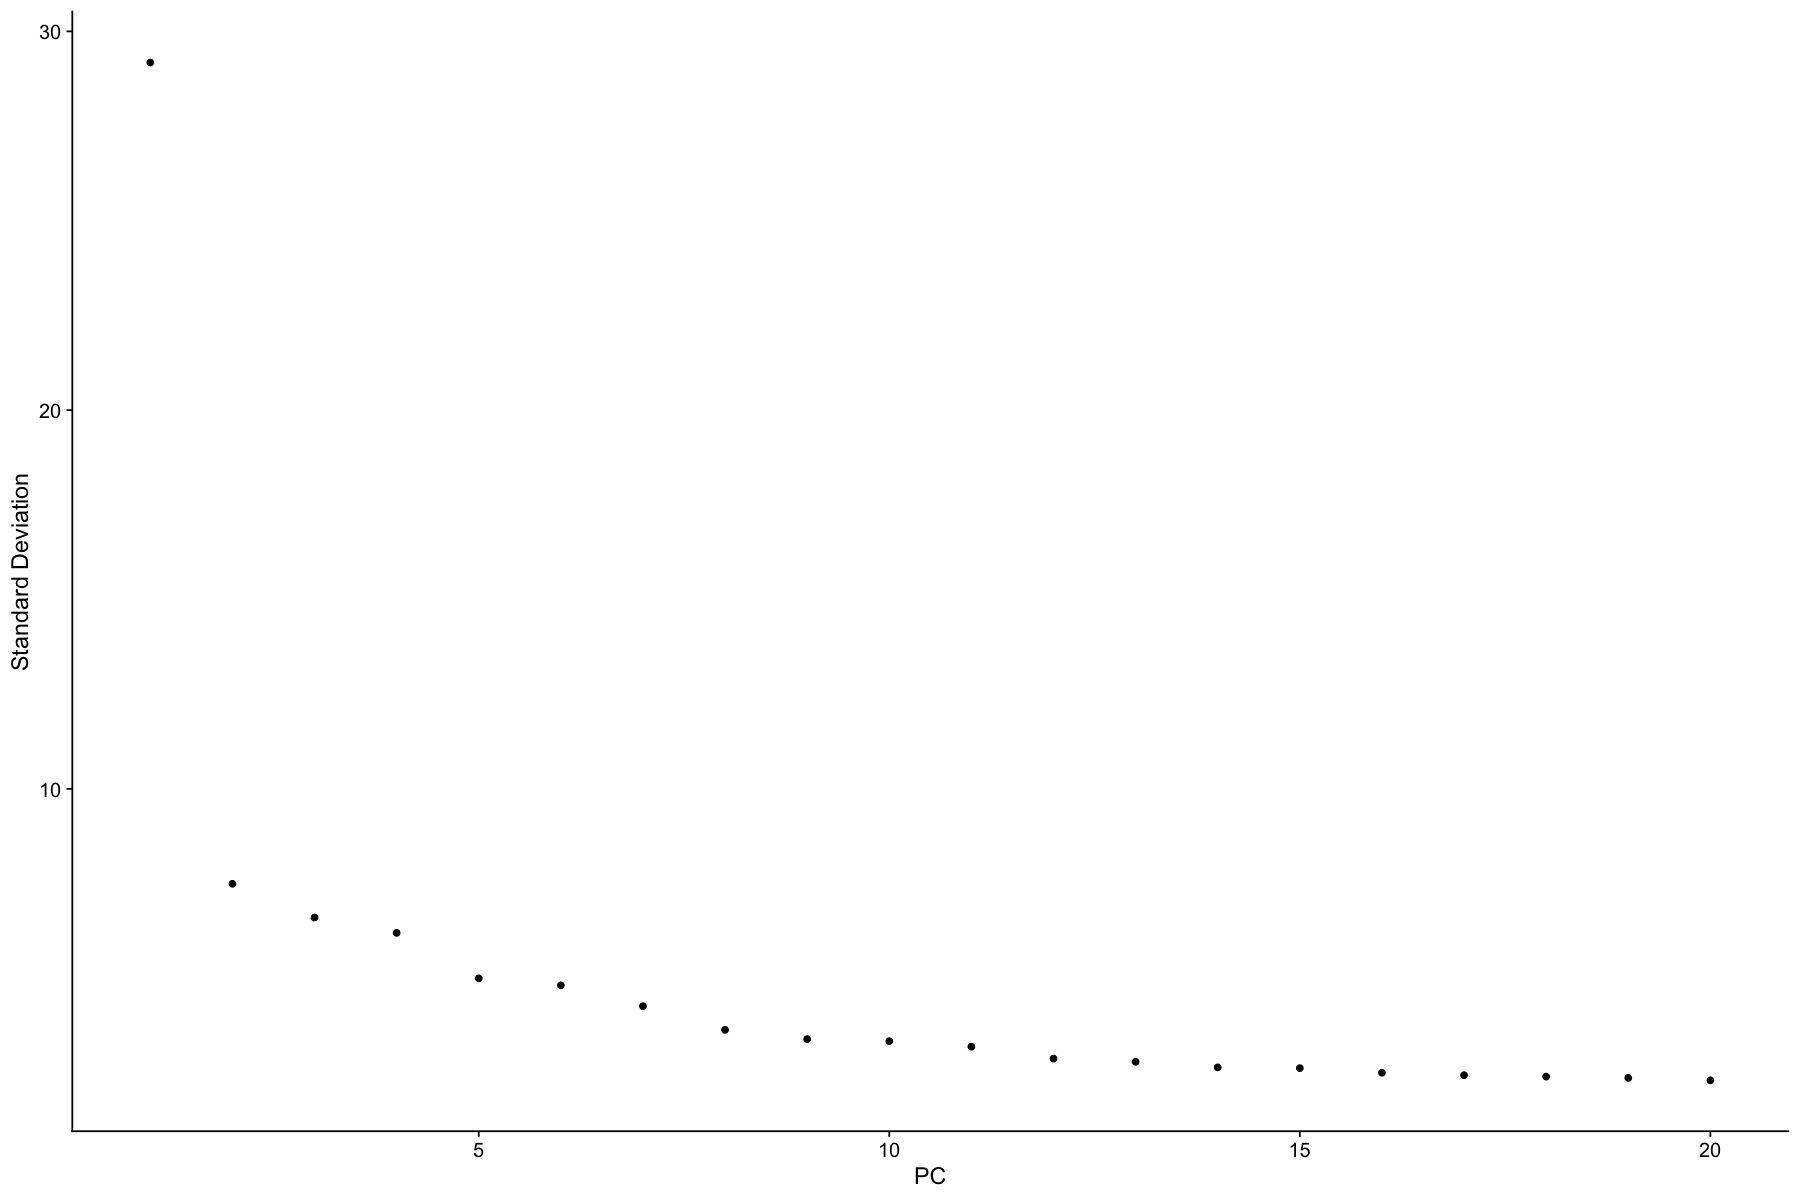

In [55]:
ElbowPlot(pbmc)

### Heat Maps for PC

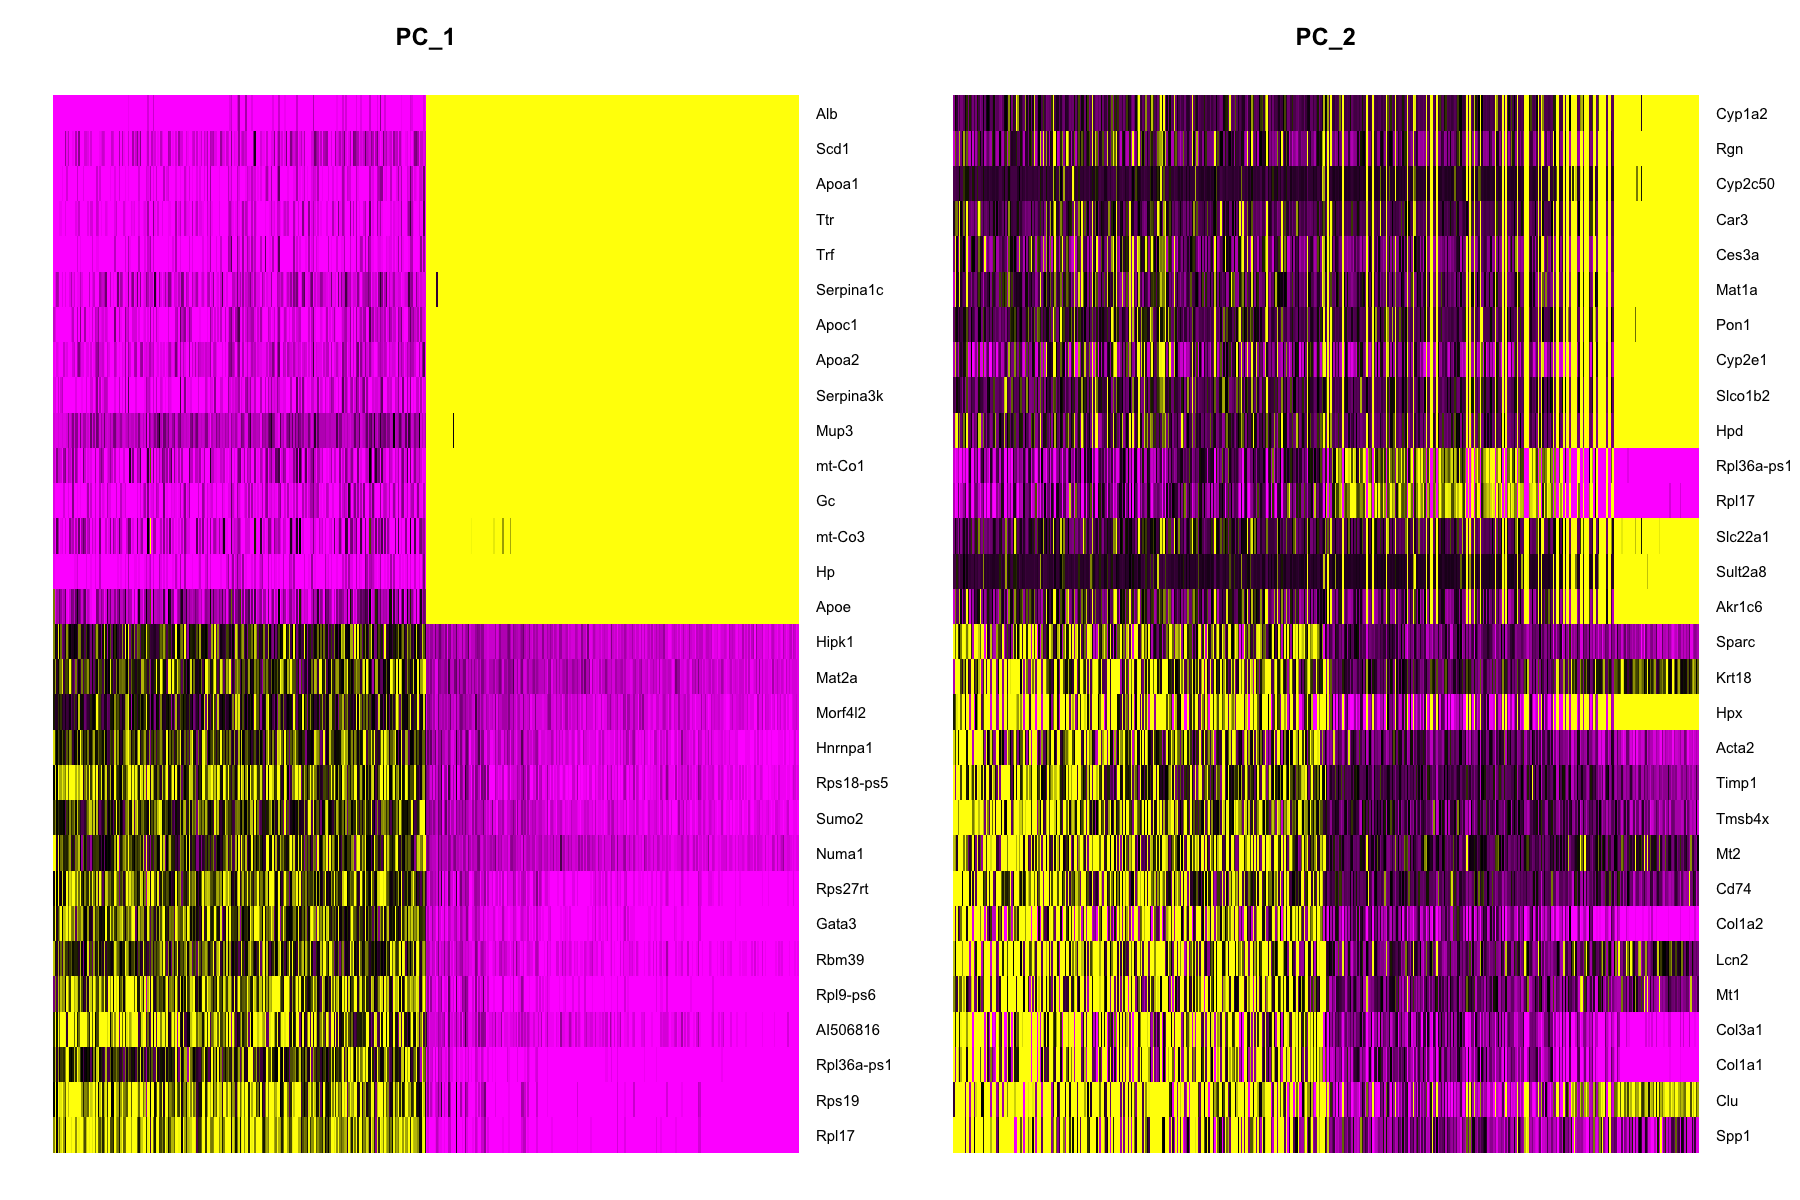

In [56]:
DimHeatmap(pbmc, dims = 1:2, cells = 500, balanced = TRUE)

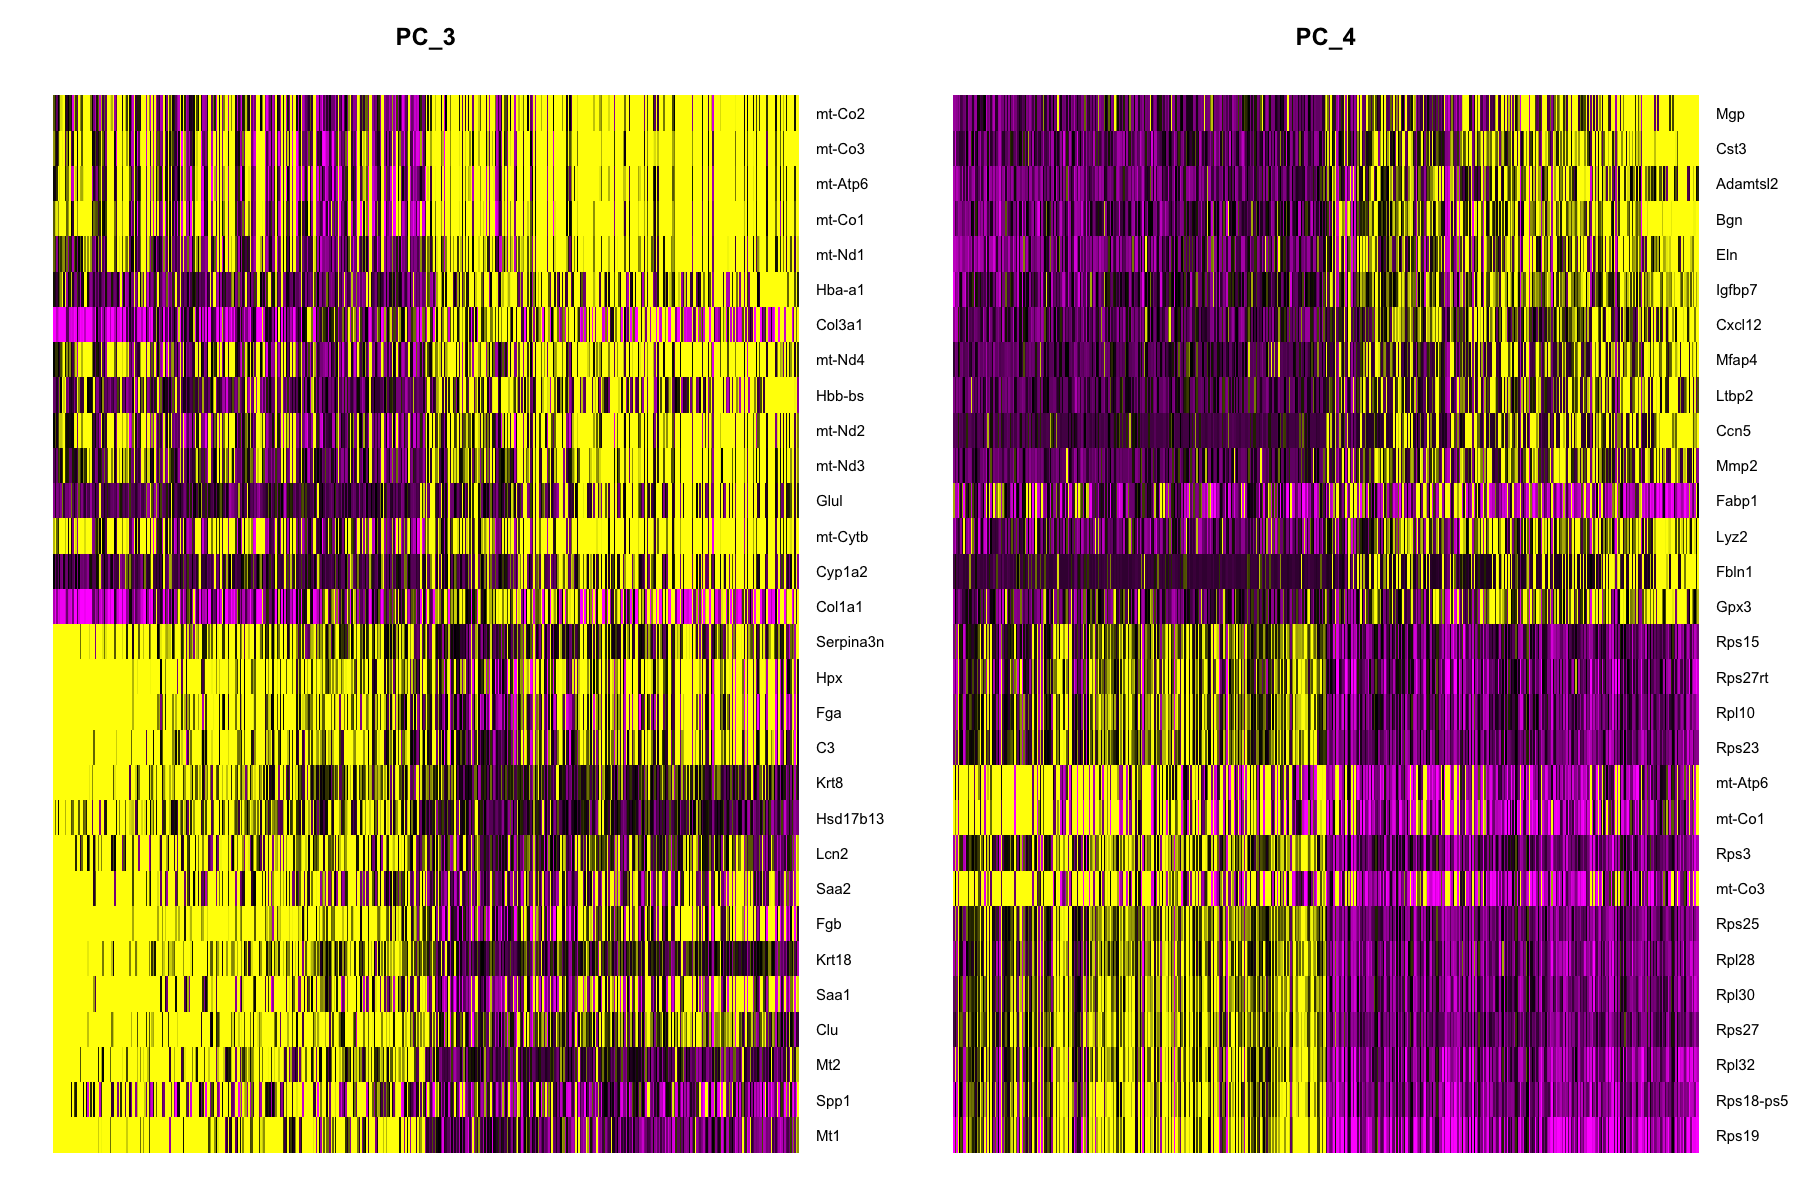

In [57]:
DimHeatmap(pbmc, dims = 3:4, cells = 500, balanced = TRUE)

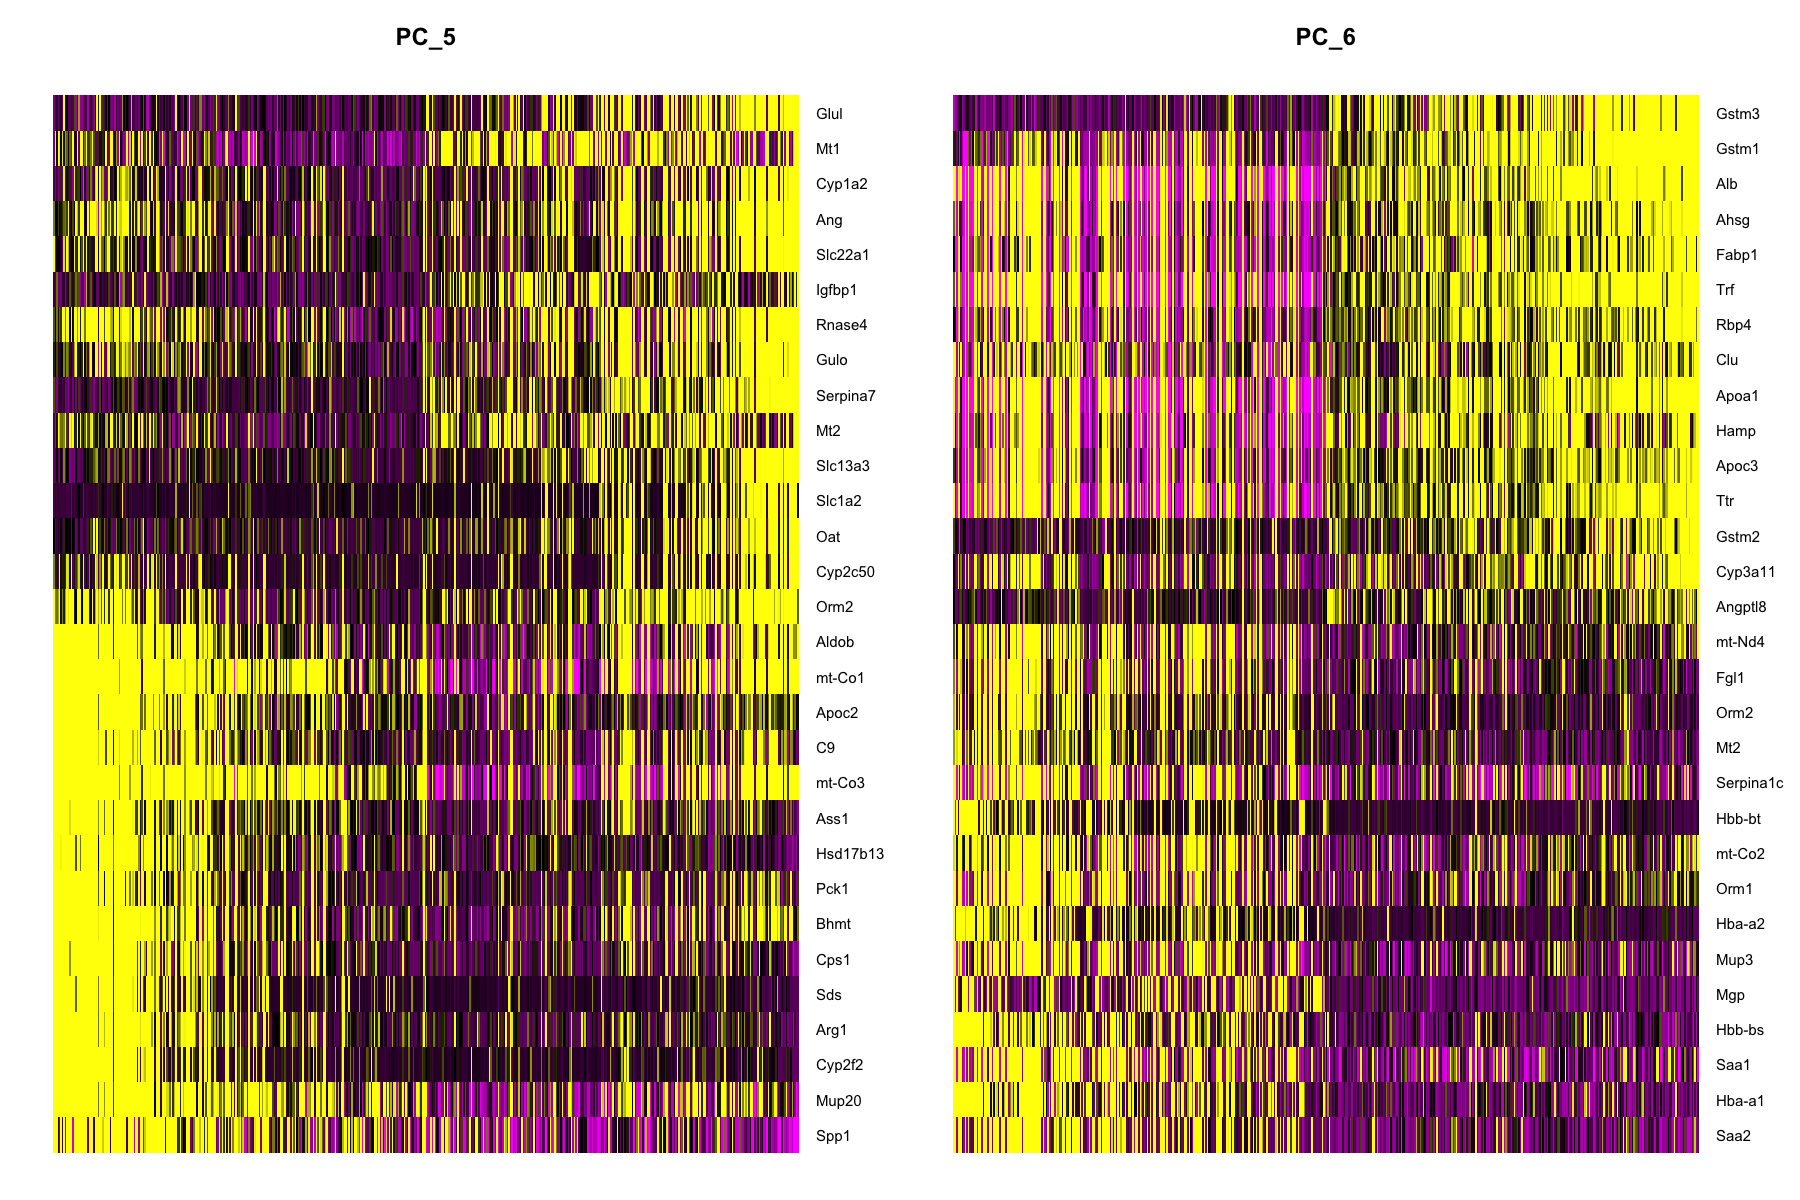

In [58]:
DimHeatmap(pbmc, dims = 5:6, cells = 500, balanced = TRUE)